# A1 : Predicting Car Price

In [285]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle


In [286]:
df = pd.read_csv('/Users/biraj/Desktop/Github/ait-ml/predict-car-price/notebooks/Cars.csv')

In [287]:
df.shape

(8128, 13)

In [288]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [290]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [291]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Performing EDA

<b>Summary</b><br>
<b>The column <code>owner</code> has been Label Encoded here.</b>

<b> Details<br>
- <i>Although One Hot Encoding could potentially be better here. One reason would be because the selling price of the car  would drastically be affected when the owner is Fourth and above.</i><br>

- <i> LabelEncoding could consider each label to have equal weight. This may or may not be the case. We could test OneHotEncoding!

In [292]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [293]:
le = LabelEncoder()
df["owner"] = le.fit_transform(df["owner"])


In [294]:
le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [295]:
le.transform(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'])

array([0, 1, 2, 3, 4])

In [296]:
df['owner'].value_counts()

0    5289
2    2105
4     555
1     174
3       5
Name: owner, dtype: int64

<b>Summary </br>
<b>The column <code>fuel</code> only has Diesel and Petrol. </b>

<b> Details<br>
- <i>We have removed CNG and LPG here. However, we can convert the values; This will be done for second model. </i><br>

- <i> We have LabelEncoded this feature as well.

In [297]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [298]:
df[(df['fuel']=='CNG') | (df['fuel']=='LPG')].sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7101,Hyundai Accent Executive LPG,2010,165000,80000,LPG,Individual,Manual,0,13.2 km/kg,1495 CC,93.7 bhp,124.5Nm@ 3500rpm,5.0
3306,Maruti Eeco CNG 5 Seater AC BSIV,2020,399000,5000,CNG,Individual,Manual,0,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0
2767,Maruti Wagon R LXI CNG,2018,450000,50000,CNG,Individual,Manual,0,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
2613,Hyundai Santro Xing GLS CNG,2011,185000,170000,CNG,Individual,Manual,0,11.88 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5199,Maruti Eeco CNG HTR 5-STR,2017,390000,30000,CNG,Individual,Manual,0,21.94 km/kg,1196 CC,63 bhp,83Nm@ 3000rpm,5.0


In [299]:
df.drop(df[(df['fuel']=='CNG') | (df['fuel']=='LPG')].index , inplace=True)

In [300]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

In [301]:
df.shape

(8033, 13)

In [302]:
df["fuel"] = le.fit_transform(df["fuel"])

In [303]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [304]:
le.transform(['Diesel', 'Petrol'])

array([0, 1])

In [305]:
df['fuel'].value_counts()

0    4402
1    3631
Name: fuel, dtype: int64

<b> Summary<br>
<b>The column "mileage" , "engine" and "max_power" has no units. All the values are converted to float. 

<b>Details <br>

- <i> Used regular expression here to capture the numeric values from the string.

In [306]:
# df['mileage'] = df['mileage'].str.split(" ").str[0].astype('float')
df['mileage'] = df['mileage'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [307]:
df['mileage'].sample(5)

3788    15.96
1146    22.00
5725    25.10
2738    19.40
8083    11.50
Name: mileage, dtype: float64

In [308]:
df['engine'].sample(5)

2593    2498 CC
1037    2179 CC
7735     796 CC
7274    2523 CC
5564    1405 CC
Name: engine, dtype: object

In [309]:
df['engine'] = df['engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [310]:
df['engine'].sample(5)

1975    1197.0
2453     796.0
3171    2956.0
1339    1086.0
6671    1598.0
Name: engine, dtype: float64

In [311]:
df['max_power'].sample(5)

6515     62.1 bhp
208     81.80 bhp
7353     73.9 bhp
841     85.80 bhp
735        63 bhp
Name: max_power, dtype: object

In [312]:
df['max_power'] = df['max_power'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [313]:
df['max_power'].sample(5)

4295    82.00
539       NaN
3220    88.73
7250    62.10
227     88.70
Name: max_power, dtype: float64

<b> For <code>name</code> column we took the brand name only.

In [314]:
df['name'].sample(5)

7164                  Tata Indigo CS eLX BS IV
3611               Mahindra XUV500 W11 AT BSIV
3884                           Hyundai EON Era
899                   Maruti Vitara Brezza VDi
4198    Ford EcoSport 1.5 Diesel Titanium BSIV
Name: name, dtype: object

In [315]:
df['name'] = df['name'].str.split(" ").str[0]

In [316]:
df['name'].sample(5)

927        Tata
7486    Renault
6975      Honda
5801       Fiat
7305      Honda
Name: name, dtype: object

In [317]:
df['name'].nunique()

32

<b>Summary <br></b>
<b>The column <code>torque</code> is dropped.

<b>Details<br>
- <i> We will consider this feature in model2.

In [318]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [319]:
df.drop('torque',
            axis='columns', inplace=True)

In [320]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

<b> Summary <br>
<b> The column <code>transmission</code> is LabelEncoded.


In [321]:
df['transmission'].value_counts()

Manual       6983
Automatic    1050
Name: transmission, dtype: int64

In [322]:
df["transmission"] = le.fit_transform(df["transmission"])

In [323]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [324]:
le.transform(['Automatic', 'Manual'])

array([0, 1])

In [325]:
df['transmission'].value_counts()

1    6983
0    1050
Name: transmission, dtype: int64

<b>Summary <br>
LabelEncoding <code>seller_type</code> and visualizing.


In [326]:
df['seller_type'].value_counts()

Individual          6673
Dealer              1124
Trustmark Dealer     236
Name: seller_type, dtype: int64

<Axes: xlabel='seller_type', ylabel='count'>

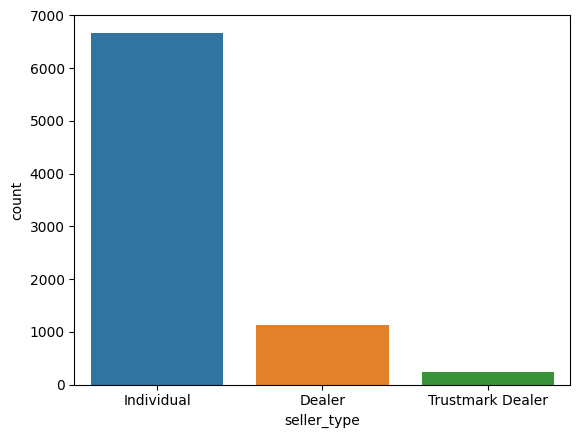

In [327]:
sns.countplot(data = df, x = 'seller_type')

In [328]:
df["seller_type"] = le.fit_transform(df["seller_type"])

In [329]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [330]:
le.transform(['Dealer', 'Individual', 'Trustmark Dealer'])

array([0, 1, 2])

In [331]:
df['seller_type'].value_counts()

1    6673
0    1124
2     236
Name: seller_type, dtype: int64

<b> Summary <br>
<b> Removing outlier <code>owner = 'Test Drive Cars'</code>

<b>Details <br>
- <i> First we see the <code>value_counts</code>. We find that <code>owner=1</code> and <code>owner=3</code> have less rows of data.
- <i> Then we inspect the box plot and find outliers at <code>owner=3</code>.
- <i> After looking at the boxplot; The boxplot for owner 3 is highly skewed. The median is almost close to the max value. Since <i> <code>owner = 3 </code> or <code>owner = 'Test Drive Cars'</code> has very less values (5 rows) and is highly skewed, we can remove them from the dataset!

In [332]:
df['owner'].value_counts()

0    5238
2    2073
4     547
1     170
3       5
Name: owner, dtype: int64

<Axes: xlabel='owner', ylabel='count'>

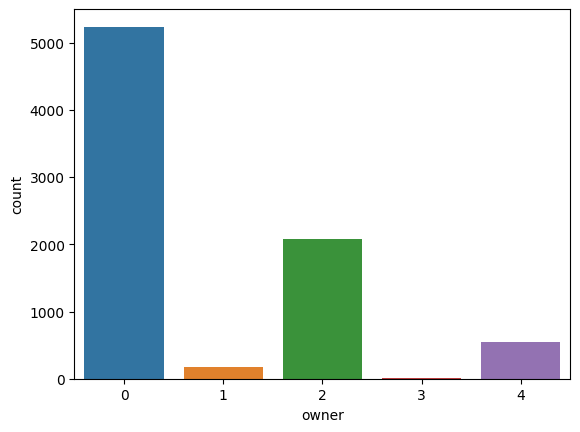

In [333]:
sns.countplot(data = df, x = 'owner')

<b> Here we can see that the <code>owner=3</code> and <code>owner=1</code> has very less values in it. It is always good to visualize and see if any outliers lie in this category.

Text(0.5, 0, 'Owner')

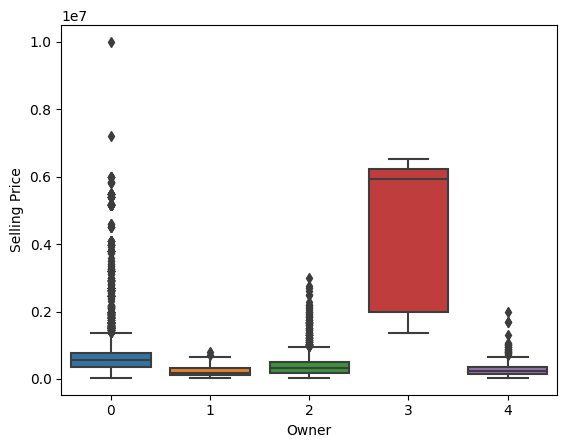

In [334]:
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

<b> After looking at the boxplot; The boxplot for owner 3 is highly skewed. The median is almost close to the max value. Since <i> <code>owner = 3 </code> or <code>owner = 'Test Drive Cars'</code> has very less values (5 rows) and is highly skewed, we can remove them from the dataset!

In [335]:
df.drop(df[(df['owner']== 3)].index , inplace=True)

In [336]:
df[ df['owner'] == 3 ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats



<b> Summary <br>
<b> Checking to see if there are outliers in <seller_type>. 

<b> Details <br>
- <i> Let us try a boxplot for <code>seller_type</code>
- <i> Here, the <code>seller_type = Dealer</code> (0 here) has significant number of rows; although it looks skewed (median is close to the min). The number of samples are high here so we keep it as a feature.

Text(0.5, 0, 'Seller Type')

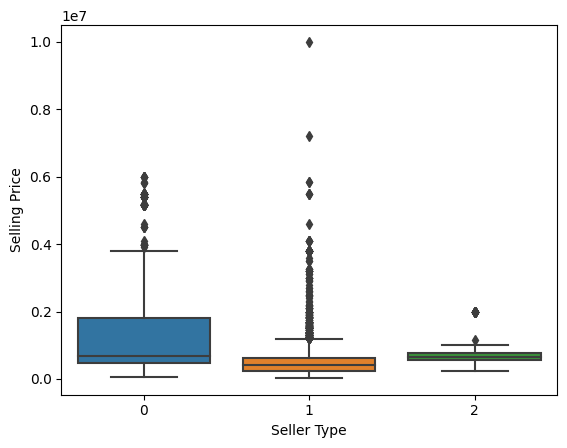

In [337]:
sns.boxplot(x = df["seller_type"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

<u> TODO: Always encode later. It would be confusing to go back and review the LabelEncoded classes. </u>

In [338]:
print('Shape fo Seller Type = Dealer -> ',  df[df['seller_type']==0].shape)

Shape fo Seller Type = Dealer ->  (1119, 12)


<b> Here, the <code>Dealer</code> has significant number of rows; So, it is better to keep the samples although it looks skewed, because it may influence our model. 

# Correlation matrix

<Axes: >

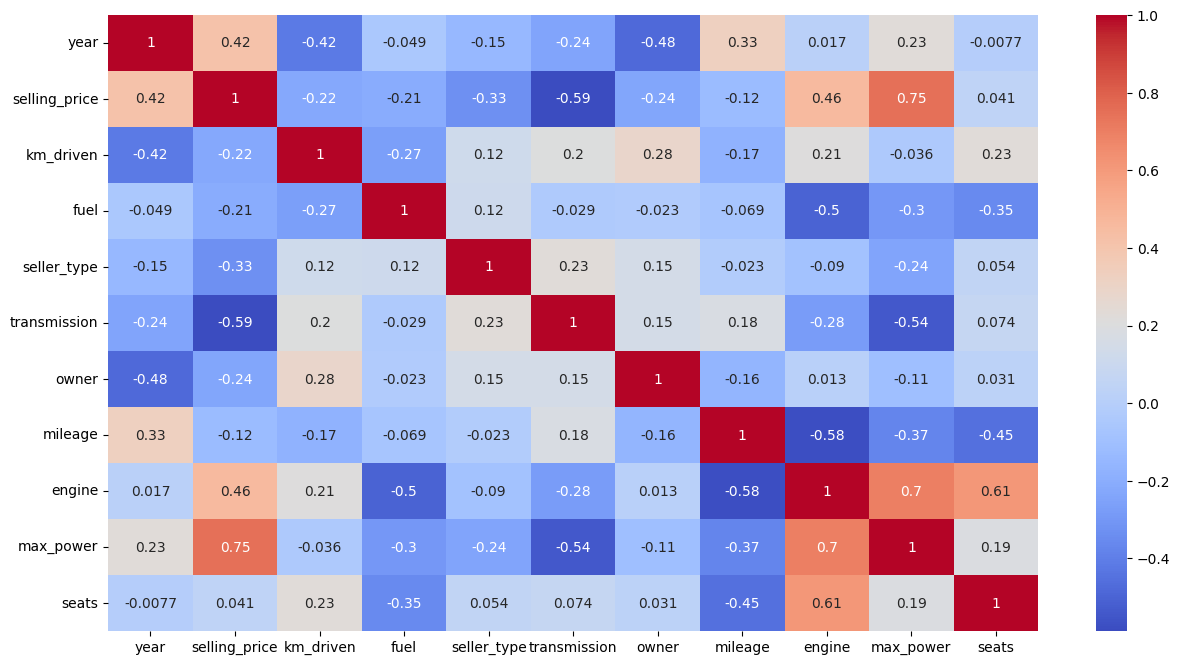

In [339]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm") 

<b> Summary <br>
<b> Interpreting the corelation matrix

<b>Details<br>
- <i> <code>max_power</code> - positive strong corelation; positive slope
- <i> <code>km_driven</code> - negative weak corelation;negative slope

<Axes: xlabel='max_power', ylabel='selling_price'>

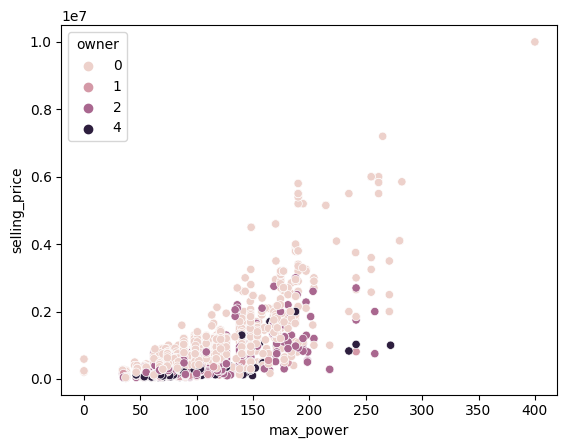

In [340]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['owner'])

<b> <code>max_power</code> and <code>selling_price</code> have positive high corelation -> 0.75 <br>
<i> From the scatter plot above, we can see that as power increases, the selling price increases as well. Thus, the best-fit line for the datapoints tend to have a positive slope.

<Axes: xlabel='km_driven', ylabel='selling_price'>

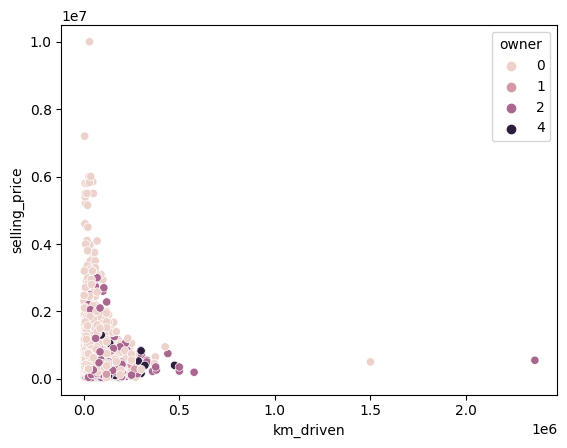

In [341]:
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue=df['owner'])

<b> <code>km_driven</code> and <code>selling_price</code> have negative weak corelation -> -0.22 <br>
<i> From the scatter plot above, we can see that as km_driven increases, the selling price decreases as well. Thus, the best-fit line for the datapoints tend to have a negative slope.

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 815.3+ KB


/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only

<Axes: xlabel='x', ylabel='y'>

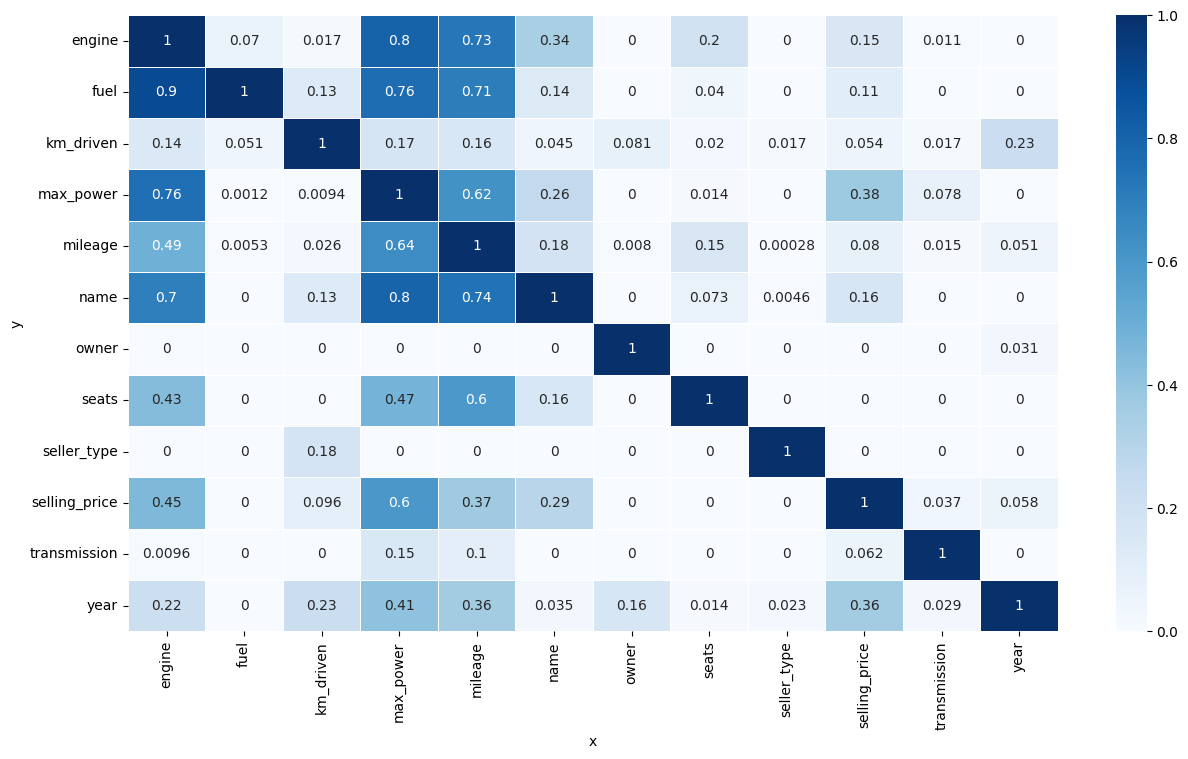

In [343]:
dfcopy = df.copy()
dfcopy.drop(['name'], axis='columns', inplace=True)


matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

<b> Summary <br>
<b> Comparing and contrasting PPScore Matrix and Correlation Heatmap

<b> Details <br>
- <i> From the correlation heatmap, lets take these feature into consideration. <code>transmission = -0.59 , max_power = 0.75 , engine = 0.46 , year = 0.42 and mileage = -0.12</code> 
- <i> From PPScore , the same features have a score of <code> transmission = 0.037, max_power = 0.6 , engine = 0.45  , year = 0.058 , mileage = 0.37, name = 0.29 </code>
- Here, mileage is almost normally distributed, so if we were to consider mileage for a linear regression it could potentially be better for our model.


<b> Confusion <br>
- <i> Why is there such a dicrepency between the values of <code>transmission</code> parameter?
- <i> <u> Possible answer? </u> Maybe because , <code>df.corr()</code> is only taking consideration linearly? OneHotEncode?

- <i> Why is <code>owner</code> not a good feature? When you think about the selling price of the car, it does make sense to consider if the car had one owner or 5 owner. However, this is not reflected in the graph. Why?
- <i> <u> Possible answer? </u> It could be because we LabelEncoded the values. Maybe i we OneHotEncoded, the model would give better result?? 

<Axes: xlabel='mileage', ylabel='selling_price'>

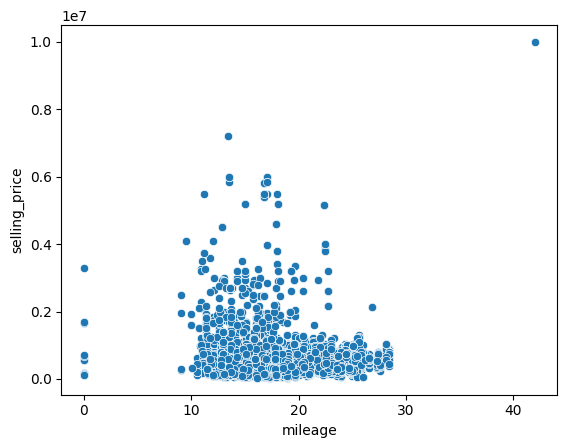

In [344]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'])

/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


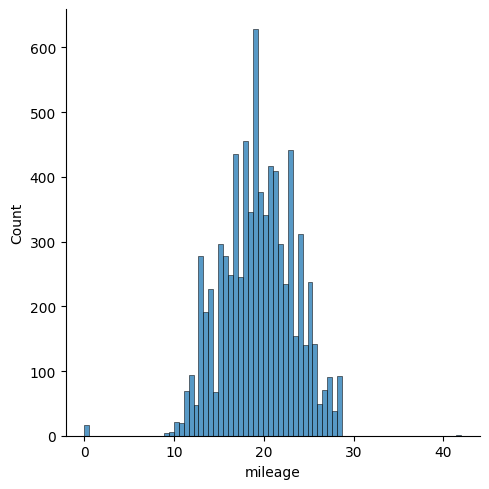

In [345]:
sns.displot(data=df, x='mileage')

# Feature Selection

In [346]:
X = df[['engine','max_power','mileage']]
X.shape

(8028, 3)

In [347]:
X.head()

,engine,max_power,mileage
0,1248.0,74.00,23.40
1,1498.0,103.52,21.14
2,1497.0,78.00,17.70
3,1396.0,90.00,23.00
4,1298.0,88.20,16.10


In [348]:
y = np.log(df['selling_price'])
y.shape

(8028,)

In [349]:
y.head()

0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64

<b><u> Split to train and test 

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 564645)

In [351]:
X_train[['engine','max_power','mileage']].isna().sum()

engine       172
max_power    167
mileage      172
dtype: int64

In [352]:
X_test[['engine','max_power','mileage']].isna().sum()

engine       42
max_power    41
mileage      42
dtype: int64

In [353]:
print('Null in y_train = ',y_train.isna().sum())
print('Null in y_test = ',y_test.isna().sum())

Null in y_train =  0
Null in y_test =  0


<b> Summary <br>
<b> Fill the missing values in engine, max_power and mileage

<b>Details<br>
- <i> Lets plot the spread i.e Histogram
- <i> For <code>mileage</code> we can consider <code>mean</code> because the histogram seems to be normally distributed.
- <i> For <code> engine</code>  and <code> max_power </code> we can consider <code>median</code>. We chose this because they are skewed, there could be other possible solutions like knn, but some simplicity we will use median.

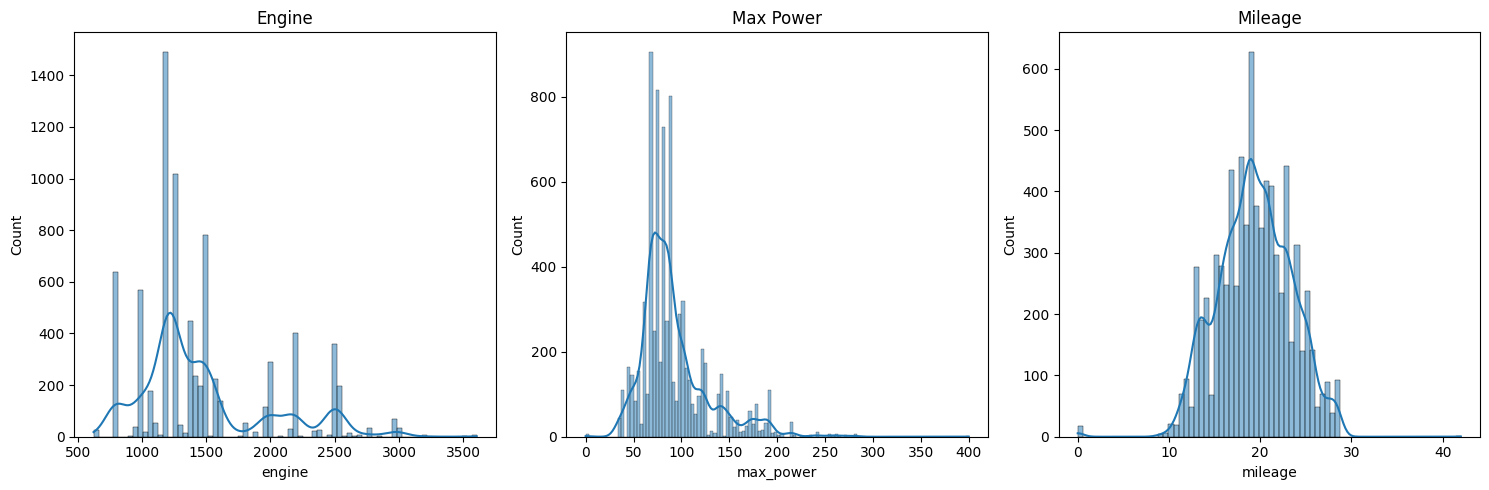

In [354]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='engine', ax=axes[0], kde=True)
sns.histplot(data=df, x='max_power', ax=axes[1], kde=True)
sns.histplot(data=df, x='mileage', ax=axes[2], kde=True)

# Set titles for each subplot
axes[0].set_title('Engine')
axes[1].set_title('Max Power')
axes[2].set_title('Mileage')

plt.tight_layout()
plt.show()

In [355]:
# Train set 
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [356]:
print("X_test engine median = " ,X_test['engine'].median())
print("X_test max_power median = ",X_test['max_power'].median())
print("X_test mileage mean = ",X_test['mileage'].mean())

X_test engine median =  1248.0
X_test max_power median =  82.85
X_test mileage mean =  19.266374680306907


In [357]:
# Test set
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)

In [358]:
assert X_train[['engine','max_power','mileage']].isna().sum().sum() == 0 

In [359]:
assert X_test[['engine','max_power','mileage']].isna().sum().sum() == 0

<b> Summary <br>
<b> Find the outlier percentage

<b> Details <br>
 - <i> The boiler code is used from Chaky's Github
 - <i> The goal here is to generate a box plot; it is quite similar to what we have done above i.e generating histograms and identifying the presence of the outliers.
 - <i> As expected <code>mileage</code> has less outliers and <code>engine</code> and <code>max_power</code> has more.


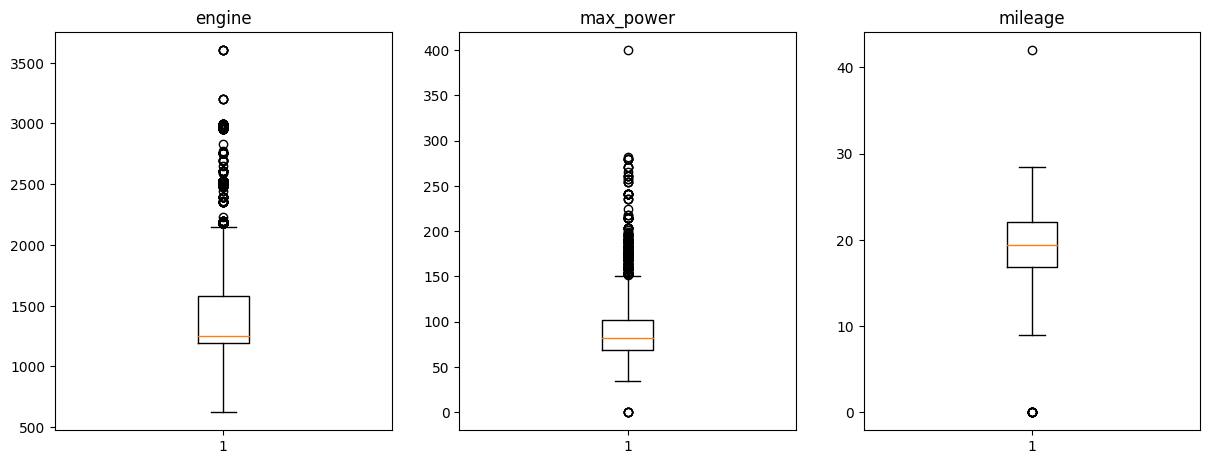

In [360]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [361]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [362]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 928
Percent of data that is outlier: 14.45%

---------------max_power---------------

Number of outliers: 464
Percent of data that is outlier: 7.23%

---------------mileage---------------

Number of outliers: 15
Percent of data that is outlier: 0.23%


In [363]:
print(X_train)

      engine  max_power  mileage
5535  1493.0      110.0    16.20
4521  1248.0       74.0    23.40
1753  2835.0      116.9    10.50
3707  1199.0       79.4    18.60
2721  1499.0      110.4    15.63
...      ...        ...      ...
6383  1193.0       88.7    17.57
5438  1199.0       75.0    20.86
218   1197.0       83.1    21.40
4134  1493.0       70.0    16.50
7064  2494.0      102.0    12.80

[6422 rows x 3 columns]


<b> Summary <br>
<b> We are scaling the X_train and X_test. We are also saving the scaler so it can be used later in the application

<b>Details<br>
- <i> As seen above, the values could be interpreted well, if they were normalized (i.e spread within a small distance). This would help the model to make good prediction.


In [364]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Saving the scaler file so that it can be used in the app.
scaler_path = 'model/scaler.pkl'
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

X_test  = scaler.transform(X_test)

In [365]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE ->", mean_squared_error(y_test, yhat))
print("r2 ->", r2_score(y_test, yhat))

MSE -> 0.2672179808029263
r2 -> 0.5984965462302689


<b> Summary <br>
<b> Tested Linear Regression.
<b> Details <br>
- <i> Linear Regression does not look like a good fit here, we can try other algorithms like KNeighbors, DecisionTree , RandomForest.

In [366]:
# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [367]:
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.28678904 -0.279669   -0.27873539 -0.27970795 -0.29243948]; Mean: -0.28346817067484337
SVR - Score: [-0.20999607 -0.24631669 -0.22749365 -0.22947487 -0.22820231]; Mean: -0.22829671617302658
KNeighbors Regressor - Score: [-0.11730459 -0.12649235 -0.11768172 -0.11120701 -0.10326654]; Mean: -0.1151904423541437
Decision-Tree Regressor - Score: [-0.12871872 -0.09365293 -0.09684785 -0.09829493 -0.09705843]; Mean: -0.10291457043394472
Random-Forest Regressor - Score: [-0.08336054 -0.0890269  -0.08085251 -0.10467061 -0.09514124]; Mean: -0.09061035884505911


<b> Summary <br>
<b> Understanding the output of each model

<b> Details <br>
- <i> Linear Regression did not perform well. The mse and r2 are high.
- <i> SVR and KNeighbors performed better
- <i> Decision-Tree and Random-Forest Regressor both performed equally good. Random-Forest was better however, because, RandomForest is an ensemble model that has multiple decision tree. Thus, both of them have similar score. 

- <u> It is important to note that achieving no error could mean that we overfitted! </u>

<b>Confusion <br>
- <i> How do we know when we overfitted our model?
- <i> <u> Possible answer? </u> We dont really know unless we create more models and test? </i>

- <i>  <u> Possible answer? </u> Could using a different random_seed affect the result achieved?

- <i> <u> Possible answer? </u> We only considred 3 feature here. What about other? Does choosing only 3 feature and creating a model better than choosing  feature? (I understand that we chose the top 3 that had the highest correlation. But still we left a few that had normal strength of corelation.) 

In [368]:
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')


grid.fit(X_train, y_train); 

In [369]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [370]:
grid.best_score_

-0.09204379380402301

<b> Summary </br>
<b> Understanding Grid Search

<b> Details </br>
- <i> We do grid search here cause we want to find the best hyperparameter.
- <i> The <code>grid.best_params_</code> gives the best possible values from the <code> param_grid </code> that we initially assigned. 


<b>Confusion</b>
- <i> How do we know what values to add in <code>param_grid</code>?
- <i> <u>Possible answer? </u> By practise and experience? HAHA. But we need to know the range of the values.Right?

In [371]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.08141403352134714

<b> The prediction looks nice. But there could be <u>overfitting</u> here. </b>

In [372]:
filename = 'model/a1m1.model'
pickle.dump(grid, open(filename, 'wb'))

In [373]:
saved_model = pickle.load(open(filename, 'rb'))

print(saved_model)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')


In [374]:
saved_model.cv_results_

{'mean_fit_time': array([0.00892172, 0.01057906, 0.0120153 , 0.01364021, 0.01801276,
        0.01741734, 0.02137861, 0.02237401, 0.02200603, 0.02909789,
        0.01558504, 0.01616664, 0.01757941, 0.02257404, 0.02381139,
        0.02587566, 0.0329319 , 0.0353107 , 0.03307323, 0.04082799,
        0.01736336, 0.01866722, 0.02311535, 0.02318788, 0.03358183,
        0.03511167, 0.038901  , 0.03695502, 0.0469027 , 0.05232944]),
 'std_fit_time': array([0.000167  , 0.00011555, 0.00012223, 0.00011731, 0.00515207,
        0.00107916, 0.00289972, 0.0029173 , 0.00078319, 0.00321708,
        0.00375028, 0.00157386, 0.00053741, 0.00415436, 0.00367012,
        0.0018666 , 0.00733509, 0.00705401, 0.00264129, 0.00315226,
        0.00277446, 0.00252321, 0.00400149, 0.00129681, 0.00495333,
        0.00726999, 0.01066096, 0.00655783, 0.00730012, 0.00994843]),
 'mean_score_time': array([0.00070767, 0.00073547, 0.00074229, 0.0007956 , 0.00093594,
        0.00086908, 0.00095611, 0.00101957, 0.00103836, 0.00

In [375]:
# [['engine','max_power','mileage']]
sample = np.array(df[['engine', 'max_power', 'mileage']].sample(1).values.tolist())
print(sample)

[[1197.     82.85   18.5 ]]


In [376]:
predicted_price = saved_model.predict(scaler.transform(sample))
print(predicted_price)
print("The selling price -> ", np.exp(predicted_price))


[12.76921968]
The selling price ->  [351238.12138043]


/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<b>Summary<br> 
<br> Why the transform and <code>np.exp()<code>?

<b>Details <br>
- <i> The model was trained on the scaled data. Thus we need to supply scaled values.
- <i> The output will also be transformed. Since <code>y</code> was transformed using <code>np.log()</code>.
- <i> Thus, the output we receive is the transformed value. We need to revert it by <code> np.exp(pred_y) </code>.

## Final Summary 

1. <code>engine</code>, <code>max_power</code> and <code>mileage</code> seems to the important feature.

    <b> Thoughts/Questions </b>
    - The feature <code>owner</code> was label encoded here. I feel like OneHotEncoded would have improved the model. (Will work on new model to test this!) 
    - Considering <code>torque</code> would be even better.Isn't converting km/kg to kmpl another starting point? <u>Possible answer</u> Maybe thats where domain expertise is required. 

<br></br>

2. The importance of the feature is based on the Correlation matrix and PPScore. I have selected strong positive corelated features. 

    <b> Thoughts/Questions [Mentioned above in the notebook too!]</b><br> 
    - <i> Why is there such a dicrepency between the values of <code>transmission</code> parameter?
    - <i> <u> Possible answer? </u> Maybe because , <code>df.corr()</code> is only taking consideration     linearly? OneHotEncode?

    - <i> Why is <code>owner</code> not a good feature? When you think about the selling price of the car, it does make sense to consider if the car had one owner or 5 owner. However, this is not reflected in the graph. Why?
    - <i> <u> Possible answer? </u> It could be because we LabelEncoded the values. Maybe i we OneHotEncoded, the model would give better result?? 

  <br></br>  

3. Linear Regression does not perform well. Decision-Tree and Random-Forest Regressor both performed equally good. Random-Forest was better however, because, RandomForest is an ensemble model that has multiple decision tree. 

    <b>Thoughts/Confusion? </b>
    - <i> I have so many questions regarding overfitting and selecting the model. Will reach out to learn more.

<br></br>

4. Reference to 1. Maybe tweaking and performing the EDA again would only be better for LinearRegression model. I have a strong intuition that RandomForest would be a good choice because the LinearRegression Model's error was high. But maybe RandomForest was overfitted?

 
<br>
</br>

## Future Scope

1. Parse the form elements properly. Currently, we just consider the <code>type</code> of the feature that our model uses. 
2. Explore more models like XGBoost.
3. Better UI. (there is room for a good UI after each iteration haha!)
4. Feature Engineering can be done here. Using <code>torque</code> column is one option. Converting km/kg to kmpl in <code>mileage</code> could be another thing.


 
<br>
</br>


 <i> *** The summary is relatively not so extensive here because I have explained every bit of code that I have written above *** </i>





    